# Neural Networks <a href="https://colab.research.google.com/github/burakai/ENGR4450/blob/main/4_support-vector-machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Overview of Key Concepts

### Artificial Intelligence (AI)
- Artificial Intelligence (AI) is a broad field of computer science dedicated to creating systems that perform tasks requiring human intelligence.

- This includes problem-solving, learning, reasoning, and understanding language.

- AI encompasses a wide range of techniques and approaches, from traditional rule-based systems to sophisticated neural networks.

### Machine Learning (ML)
- Machine Learning (ML) is a subset of AI focused on developing algorithms and models that enable systems to learn from and make predictions or decisions based on data.

- Unlike traditional AI systems that rely on explicit programming, ML algorithms learn patterns and relationships directly from data.

- ML is divided into various types, including supervised learning, unsupervised learning, and reinforcement learning.

### Deep Learning (DL)
- Deep Learning (DL) is a specialized area within ML that involves neural networks with many layers, known as deep neural networks.

- DL models automatically learn hierarchical representations of data, allowing them to handle complex tasks such as image recognition, speech processing, and natural language understanding.

- DL requires large datasets and significant computational power for training.


<div style="max-width:500px; margin-left: auto; margin-right: auto;">
    
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/AI_hierarchy.svg/399px-AI_hierarchy.svg.png)
    
</div>

In summary:

- **AI** is the overarching field aimed at creating intelligent systems.
- **ML** is a subset of AI focused on learning from data.
- **DL** is a specialized area within ML involving deep neural networks.

## Evolution of Perceptron to Deep Learning

<div style="max-width:800px; margin-left: auto; margin-right: auto;">
    
![image.png](https://developer.ibm.com/developer/default/articles/cc-cognitive-neural-networks-deep-dive/images/figure3.png)
    
</div>

### 1. Perceptron (1958)
- Developed by **Frank Rosenblatt** as a simple, single-layer neural network.
- Used for binary classification and worked only on linearly separable data.
- Limited by its inability to solve non-linear problems like XOR.

### 2. Multilayer Perceptron (MLP) - 1980s
- Introduced **hidden layers** to solve more complex, non-linear problems.
- Enabled through the use of **backpropagation** and **non-linear activation functions** (e.g., sigmoid, tanh).
- MLPs could learn more complex patterns but were still shallow networks.

### 3. Deep Learning (2000s-Present)
- **Deep Neural Networks (DNNs)** expanded MLPs by adding many hidden layers (hence "deep").
- Key innovations:
  - **ReLU activation** to prevent vanishing gradients.
  - **Backpropagation improvements** for deeper networks.
  - Regularization techniques like **dropout** and **batch normalization**.
- New architectures:
  - **Convolutional Neural Networks (CNNs)** for image processing.
  - **Recurrent Neural Networks (RNNs)** for sequential data (e.g., LSTMs for time series and NLP).
  - **Transformers** for advanced NLP tasks (e.g., BERT, GPT).

### 4. Enabling Technologies
- **GPU/TPU acceleration** for faster training.
- **Transfer learning** with pre-trained models for efficient training on small datasets.

The Perceptron laid the foundation for neural networks. The introduction of hidden layers, advanced architectures, and hardware advancements transformed neural networks into modern **deep learning**, powering AI breakthroughs across various domains.

## Perceptron

The perceptron is one of the simplest forms of a neural network and serves as a fundamental building block for more complex models.

It is a supervised learning algorithm used for binary classification tasks.


The Perceptron was invented by Frank Rosenblatt in 1958 while he was working at the Cornell Aeronautical Laboratory.

His goal was to create a model that could mimic the way biological neurons function in the brain, specifically to simulate how the brain processes visual information.

Rosenblatt was inspired by neuroscience, particularly how neurons work in the brain.

He aimed to create a computational model that mimicked the behavior of neurons, leading to the development of the perceptron as a simple artificial neuron.

<div style="max-width:800px; margin-left: auto; margin-right: auto;">
    
![image.png](https://www.researchgate.net/publication/355924918/figure/fig1/AS:1086621118148608@1636082071667/Analogy-between-biological-and-artificial-neuron.ppm)

</div>

While the perceptron was inspired by the functioning of biological neurons, it is important to recognize that this inspiration is just an analogy, and the perceptron does not fully replicate the complexities of real neural processes.

### Mathematical Foundation

The perceptron was built on **linear algebra** and **statistics**. It used a weighted sum of inputs to make decisions, mimicking the activation of biological neurons through input signals.

<div style="max-width:500px; margin-left: auto; margin-right: auto;">
    
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Perceptron-unit.svg/1920px-Perceptron-unit.svg.png)

</div>

A perceptron consists of input values, weights, a bias, an activation function, and an output. The general formula for the output $ y $ of a perceptron can be expressed as:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right) 
$$

where:
- $ x_i $ are the input features,
- $ w_i $ are the weights associated with the input features,
- $ b $ is the bias term,
- $ f $ is the activation function, typically a step function.

### Activation Function
The activation function determines the output of the perceptron. For binary classification, a common activation function is the Heaviside step function defined as:

$$ 
f(z) =
\begin{cases} 
1 & \text{if } z \geq 0 \\ 
0 & \text{if } z < 0 
\end{cases} 
$$


The Perceptron learning algorithm adjusts the weights and bias based on the errors made in prediction. The update rule for the weights \( w_i \) and the bias \( b \) is given by:

$$
w_i \leftarrow w_i + \eta (y_{\text{true}} - y_{\text{pred}}) x_i 
$$
$$ 
b \leftarrow b + \eta (y_{\text{true}} - y_{\text{pred}}) 
$$

where:
- $ \eta $ is the learning rate,
- $ y_{\text{true}} $ is the actual label,
- $ y_{\text{pred}} $ is the predicted output.

### Training Procedure
The perceptron is trained using the following steps:

1. Initialize weights and bias to small random values.
2. For each training example $ (x, y) $:
   - Calculate the output $ y_{\text{pred}} $.
   - Update weights and bias based on the prediction error.
3. Repeat until convergence or a predetermined number of epochs.

#### Perceptron Implementation

> ```python
> # Example: Perceptron on a simple dataset
> from sklearn.linear_model import Perceptron
> from sklearn.datasets import make_classification
> from sklearn.model_selection import train_test_split
> from sklearn.metrics import accuracy_score
>
> # Generate a simple classification dataset
> X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1)
>
> # Split into train and test sets
> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
>
> # Initialize the Perceptron model
> model = Perceptron()
>
> # Train the model
> model.fit(X_train, y_train)
>
> # Predict on the test set
> y_pred = model.predict(X_test)
>
> # Evaluate the model
> accuracy = accuracy_score(y_test, y_pred)
> print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")
>```

The perceptron model is a foundational concept in neural networks and machine learning. Despite its limitations with non-linearly separable data, it laid the groundwork for more complex architectures, such as multi-layer perceptrons and deep learning models.

---

### Perceptron Example

#### Importing Libraries

In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

#### Data Handling

In [13]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

##### Category Selection
`categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']` defines a list of categories from the 20 Newsgroups dataset.

The categories specified here are:
1. Sports related to hockey
1. Sports related to baseball
1. Automotive content

##### Fetching the Newsgroups Data
- `fetch_20newsgroups` is a function from the `sklearn.datasets` module that loads the 20 Newsgroups dataset.
- The subset parameter specifies whether to fetch the training or testing subset. Here, it’s set to `'train'` for the training set and `'test'` for the testing set.
- The `categories` parameter restricts the fe%ched data to the specified categories.
- The remove parameter specifies text elements to `remove` from the documents. In this case, it removes headers, footers, and quoted text, which are often not relevant for analysis.

##### Vectorization
- `TfidfVectorizer` is used to convert a collection of raw documents (text data) into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency, which is a statistical measure that evaluates the importance of a word in a document relative to a collection (or corpus) of documents.

- `fit_transform` is called on the training data (`newsgroups_train.data`), which learns the vocabulary of the corpus and transforms the training data into a TF-IDF feature matrix. The resulting matrix, X_train, has documents as rows and features (terms) as columns, with values representing their TF-IDF scores.
- `transform` is called on the test data (`newsgroups_test.data`), which transforms the test data into a TF-IDF feature matrix based on the vocabulary learned from the training data. This ensures that the test data is represented in the same feature space as the training data. The resulting matrix X_test contains the TF-IDF scores for the test documents.

The code starts by defining specific categories from the 20 Newsgroups dataset and then fetches both training and test sets excluding certain textual elements (headers, footers, etc.).
Lastly, it uses TF-IDF vectorization to convert the text data into a numerical format that can be utilized for machine learning tasks, like classification or clustering.

#### Model Selecting and Fitting the Model

In [14]:
model = Perceptron(random_state=42)

model.fit(X_train, newsgroups_train.target)

Perceptron(random_state=42)

- The code initializes a perceptron model with a specific random state for reproducibility.
- It then fits (trains) the model using the TF-IDF feature matrix from the training data (`X_train`) and the corresponding target labels for the training documents (`newsgroups_train.target`).

After running this code, the model object will have learned the relationship between the features of the training documents and their corresponding labels, which can then be used to make predictions on new, unseen data.

#### Evaluation of Model

In [15]:
predictions = model.predict(X_test)
print(classification_report(newsgroups_test.target, predictions, target_names=newsgroups_test.target_names))

                    precision    recall  f1-score   support

         rec.autos       0.87      0.93      0.90       396
rec.sport.baseball       0.89      0.78      0.83       397
  rec.sport.hockey       0.85      0.89      0.87       399

          accuracy                           0.87      1192
         macro avg       0.87      0.87      0.87      1192
      weighted avg       0.87      0.87      0.87      1192



`classification_report` is a function from the `sklearn.metrics` module that generates a report for evaluating the performance of a classification model. The report includes metrics such as **precision**, **recall**, **F1-score**, and support for each class.

## Multi-Layer Perceptron (MLP)

##### What is an MLP?

<div style="max-width:500px; margin-left: auto; margin-right: auto;">
    
![image.png](https://scikit-learn.org/stable/_images/multilayerperceptron_network.png)
    
</div>

- The Multi-layer Perceptron (MLP) is a type of feedforward artificial neural network.
- It consists of multiple layers: an input layer, one or more hidden layers, and an output layer.
- Unlike the perceptron, the MLP can model non-linear relationships between inputs and outputs due to the use of activation functions like ReLU or sigmoid.

##### MLP Algorithm

- Input: Data is passed to the input layer.
- Forward Propagation: Data flows through the hidden layers, where the neurons perform a weighted sum followed by an activation function.
- Backpropagation: The error is calculated at the output and propagated backward through the network to update the weights.


You can implement an MLP using the `MLPClassifier` class from the `sklearn.neural_network` module.

#### MLP Implementation

> ```python
> # Example: MLP on a simple dataset
> from sklearn.neural_network import MLPClassifier
> 
> # Initialize the MLP model
> model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
> 
> # Train the model
> model.fit(X_train, y_train)
> 
> # Predict on the test set
> predictions = model.predict(X_test)
> 
> # Evaluate the model
> accuracy = accuracy_score(y_test, predictions)
> print(f"MLP Accuracy: {accuracy * 100:.2f}%")

### MLP Example 1

#### Importing Libraries

In [17]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

- 	**warnings:** Used to manage warning messages, in this case, to suppress convergence warnings.
<br/>
<br/>

-	**matplotlib.pyplot as plt:** Used for visualizing the weights of the neural network.
<br/>
<br/>

-	**fetch_openml:** Fetches datasets from OpenML (in this case, the MNIST dataset).
-	**ConvergenceWarning:** A specific warning for when the neural network does not converge within the given iterations.
-	**train_test_split:** Splits data into training and test sets.
-	**MLPClassifier:** A multi-layer perceptron (MLP) classifier used for building a neural network.

#### Handling Data

##### About the Dataset: MNIST (mnist_784)

<div style="max-width:800px; margin-left: auto; margin-right: auto;">
    
![image.png](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png)
    
</div>


The dataset used in your code is the **MNIST** dataset, fetched from **OpenML**.

**OpenML** is an online platform for sharing datasets and machine learning experiments.

It provides easy access to a variety of datasets and also allows users to share and collaborate on experiments, making it a valuable resource for machine learning researchers and practitioners.

##### MNIST (Modified National Institute of Standards and Technology)

- **Description**: The MNIST dataset contains **70,000 images** of handwritten digits from 0 to 9. Each image is a grayscale image of size **28x28 pixels**, which corresponds to 784 total features (or pixels).
- **Features**:
  - **784 input features (pixels)**: Each image is represented as a 1D array of 784 pixel values, where each pixel has a value between 0 (black) and 255 (white).
  - **Target labels (y)**: The labels range from 0 to 9, representing the digit present in each image.
- **Size**: The dataset is relatively large, with 60,000 images used for training and 10,000 for testing in the original MNIST benchmark, although it can be split differently.
- **Applications**: 
  - Used for benchmarking machine learning models, especially in classification tasks.
  - A popular dataset for deep learning and computer vision research.

In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

##### Loading and Normalizing the MNIST Dataset
- The MNIST dataset is loaded using `fetch_openml`. The dataset consists of 70,000 28x28 grayscale images of digits (features X) and their corresponding labels (y).
- **Normalization:** The pixel values of the images are divided by 255 to scale the data into the range [0, 1] (since pixel values are initially between 0 and 255).

##### Splitting the Data
- The dataset is split into training and test sets using an 80%/20% split.
- random_state=0 ensures reproducibility.
- test_size=0.7 reserves 70% of the data for testing (and 30% for training).

#### Setting up the Neural Network (MLPClassifier) and Training

`MLPClassifier` below creates a neural network with:

- `hidden_layer_sizes=(40,)`: A hidden layer with 40 neurons.
- `max_iter=8`: The network will perform 8 iterations (epochs). Since this is low, the network might not converge (reach the minimum error rate).
- `alpha=1e-4`: Regularization term (to avoid overfitting).
- `solver='sgd'`: Stochastic Gradient Descent (SGD) is used for optimization.
- `verbose=10`: Prints progress during training.
- `random_state=1`: Ensures consistent results.
- `learning_rate_init=0.2`: The initial learning rate for training.

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

- The code ignores any `ConvergenceWarning` that may arise because the model might not converge within just 8 iterations.
- `mlp.fit(X_train, y_train)`: Trains the model on the training data (`X_train`, `y_train`).

#### Evaluating the Model

The performance is evaluated by computing the accuracy on both the training set and the test set using `mlp.score()`.

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

#### Visualizing the Learned Weights

This part visualizes the weights of the neural network.

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

- `mlp.coefs_[0]` contains the weights learned by the first layer (input to hidden layer).
- The weights are reshaped into 28x28 matrices, which correspond to the shape of the original images.
- The `matshow()` function from `matplotlib` is used to visualize these weights as grayscale images.

We've loaded the MNIST dataset, trained an MLP (neural network) on it with 40 neurons in the hidden layer, evaluated its performance, and then visualized the learned weights.

The low `max_iter` value leads to the network likely not converging within the available iterations, hence the suppression of the convergence warnings.

### MLP Example 2

#### Importing Libraries

In [20]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### Setting up the Neural Network (MLPClassifier)

In [21]:
h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

#### Handling Data

In [22]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

#### Training and Visualizing the Learned Weights


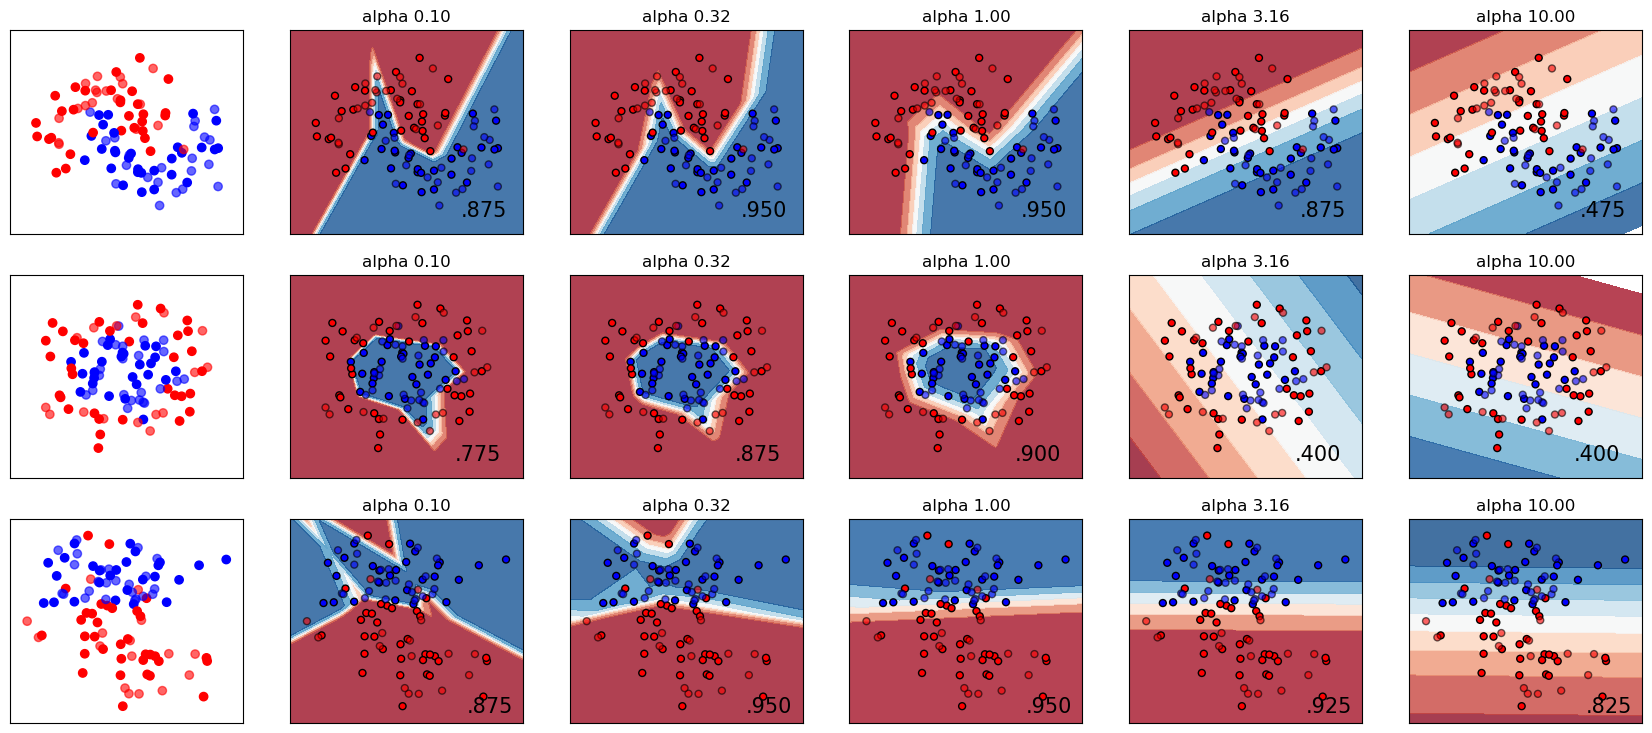

In [10]:
figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

## Conclusion

The perceptron served as a foundational building block for neural computation.

As a linear classifier, the perceptron could only solve linearly separable problems, which limited its application. However, the development of multilayer perceptrons (MLPs) combined with techniques like backpropagation, allowed for the modeling of more complex and non-linear relationships.

<div style="margin-left: auto;
            margin-right: auto;
            width: 40%">

**Differences Between Perceptron and MLP**

| Feature                        | Perceptron                        | Multi-Layer Perceptron (MLP)        |
|---------------------------------|-----------------------------------|-------------------------------------|
| **Type**                        | Linear classifier                 | Can model non-linear relationships |
| **Architecture**                | Single layer                      | Multiple layers (input, hidden, output) |
| **Activation Function**         | Step function (binary output)     | Differentiable functions like ReLU, sigmoid |
| **Learning Capability**         | Solves only linearly separable problems | Solves both linear and non-linear problems |
| **Complexity**                  | Simple                            | More complex due to multiple layers and backpropagation |
| **Training Algorithm**          | Perceptron Learning Rule          | Backpropagation with gradient descent |
| **Convergence**                 | Guaranteed for linearly separable data | May not converge; depends on network architecture and hyperparameters |

</div>

As computing power increased and larger datasets became available, deep learning emerged as a powerful continuation of neural network research, leveraging architectures with multiple hidden layers—hence the term "deep."

Deep learning algorithms, such as convolutional neural networks (CNNs) and recurrent neural networks (RNNs), can automatically learn hierarchical features from data, enabling breakthroughs in areas like computer vision, natural language processing, and speech recognition.

<div style="max-width: 800px; margin-left:auto; margin-right: auto;">
    
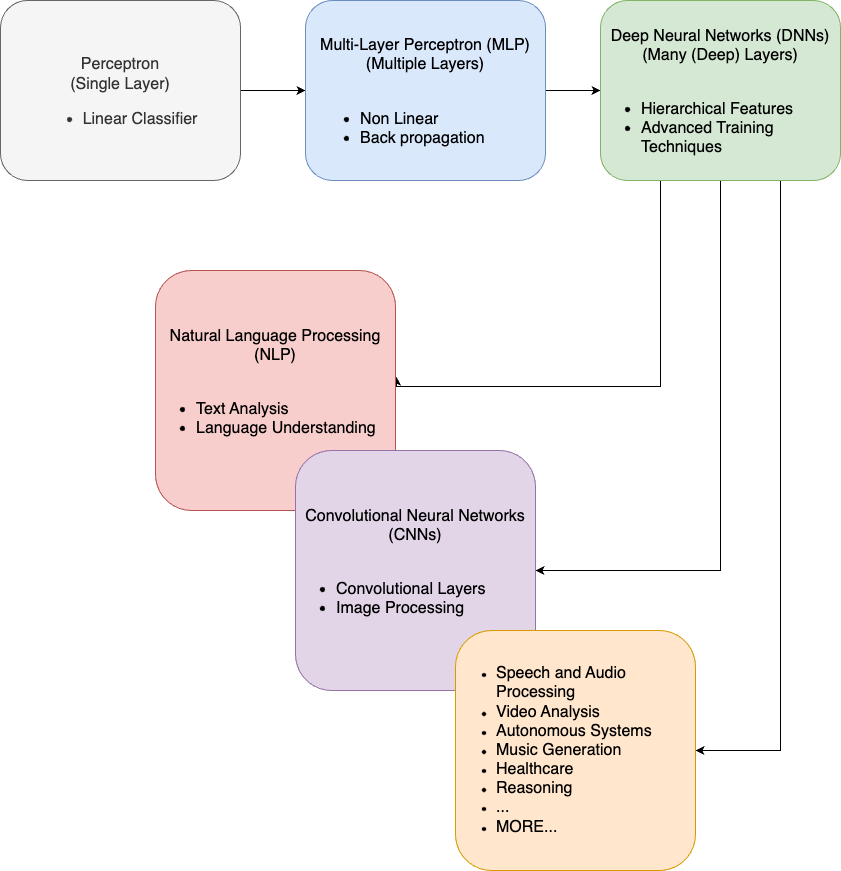
    
</div>

This evolution from simple perceptrons to complex deep learning models illustrates the significant advancements in understanding and implementing neural networks, contributing to the rise of artificial intelligence in various applications.

### How deep the rabbit-hole goes?

<div style="max-width:800px; margin-left: auto; margin-right: auto;">
    
![ai-map.png](https://pbs.twimg.com/media/FHOuHzfWYAU8i0a?format=jpg&name=medium)
    
</div>

<div style="max-width:800px; margin-left: auto; margin-right: auto;">
    
![ai-map.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*cuTSPlTq0a_327iTPJyD-Q.png)
    
</div>



### **Bonus:** "Machine Learning Is Not Like Your Brain" by Charles J. Simon

You should have realised by now that the relationship between artificial neural networks and biological neural networks is basically based on analogy.

If you still think they are quite similar, I strongly recommend you to watch the following video which analyses the main differences between the two:

<div align = "center">
<iframe width="800" height="450" src="https://www.youtube.com/embed/KQP1gPTk0FI?si=ZSPoyhcSWrfyls62" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>